In [652]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf
import sklearn
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.layers import Dense,InputLayer,Dropout,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
pd.set_option("display.max_columns",None)

In [449]:
df=pd.read_csv("Net_generation_United_States_all_sectors_monthly.csv",sep='\t')

In [451]:
df.iloc[3]

Net generation United States all sectors monthly    Month,all fuels (utility-scale) thousand megaw...
Name: 3, dtype: object

In [453]:
df.drop(df.index[0:3],inplace=True)

In [455]:
columns_list = [
    "Month",
    "all_fuels",
    "coal",
    "natural_gas",
    "nuclear",
    "conventional_hydroelectric",
    "wind",
    "all_solar"
]


for col,name in zip(range(8),columns_list):
    df[f"{name}"]=df['Net generation United States all sectors monthly'].str.split(",").str.get(col)

In [457]:
df.drop(["Net generation United States all sectors monthly","all_solar"],axis=1,inplace=True)

In [459]:
df.drop(df.index[0:4],inplace=True)

In [461]:
df.reset_index(drop=True,inplace=True)

In [463]:
df.head()

,Month,all_fuels,coal,natural_gas,nuclear,conventional_hydroelectric,wind
0,Nov 2024,324140.91112,44994.68815,137041.41254,61904.051,18275.92039,40960.54107
1,Oct 2024,334119.15232,46957.33506,146347.74525,58773.349,15821.35795,40053.82313
2,Sep 2024,359609.14705,54628.10634,169393.44023,62660.468,16665.75643,28995.2059
3,Aug 2024,423536.49437,68837.95979,203074.90468,69760.288,21364.13449,28763.96196
4,Jul 2024,430456.15612,71686.29409,207717.35786,69885.242,21187.54055,27970.5392


In [465]:
df.sort_values(by="Month",inplace=True)

In [467]:
df.reset_index(drop=True,inplace=True)

In [469]:
df.set_index("Month",inplace=True)

In [471]:
df.columns

Index(['all_fuels', 'coal', 'natural_gas', 'nuclear',
       'conventional_hydroelectric', 'wind'],
      dtype='object')

In [473]:
df = df.apply(pd.to_numeric, errors='coerce')


In [475]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots


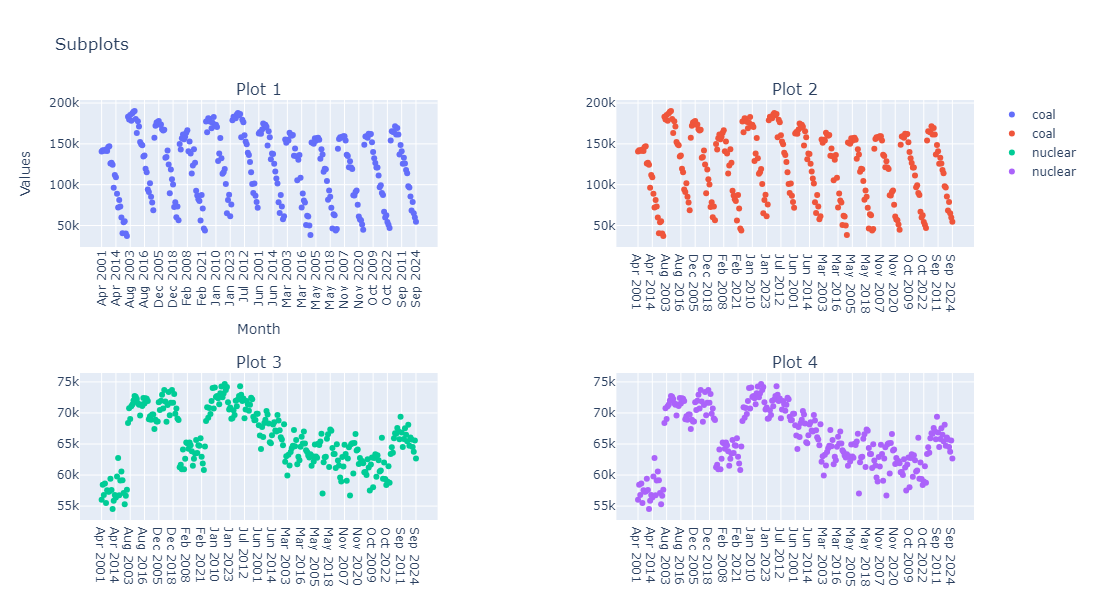

In [519]:
fig = go.Figure()

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4") ,vertical_spacing=0.3,horizontal_spacing=0.2
)

dict_1={
    1:"all_fuels",
    2:"coal"
    
    
}

dict_2={ 
    1:"natural_gas",
    2:"nuclear"
    
    
}

dict_3={
      1:"conventional_hydroelectric",
      2:"wind"
}


dictonary_name=[dict_1,dict_2,dict_3]
for row,dict_ in zip(range(1,3),dictonary_name):
    col_name = dict_[col]
    for col in range(1,3):
        fig.add_trace(go.Scatter(x=df.index, y=df[col_name], mode='markers', name=col_name), row=row, col=col)


fig.update_layout(title="Subplots",xaxis_title="Month",yaxis_title="Values",xaxis=dict(tickangle=270),height=600,width=800)


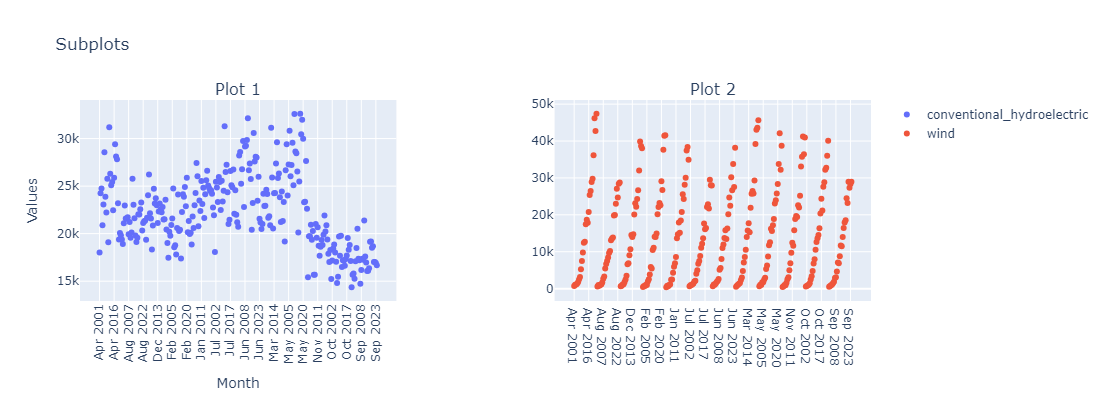

In [479]:
fig = go.Figure()

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Plot 1", "Plot 2") ,vertical_spacing=0,horizontal_spacing=0.2
)


dict_3={
      1:"conventional_hydroelectric",
      2:"wind"
}

for row in range(1,2):
    for col in range(1,3):
        fig.add_trace(go.Scatter(x=df.index, y=df[dict_3[col]], mode='markers', name=dict_3[col]), row=row, col=col)


fig.update_layout(title="Subplots",xaxis_title="Month",yaxis_title="Values",xaxis=dict(tickangle=270),height=400,width=1000)


<Axes: >

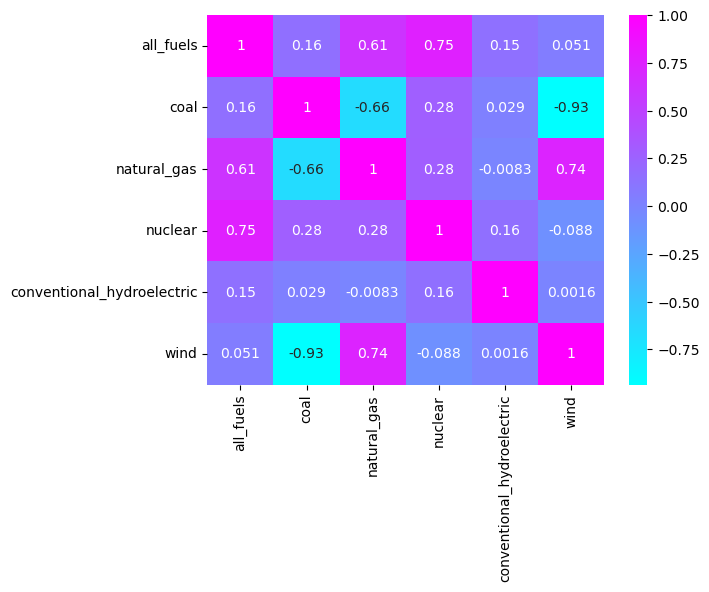

In [481]:
sns.heatmap(df.corr(),annot=True,cmap="cool")

In [483]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [485]:
scaled_data=scaler.fit_transform(df)


In [487]:
sequences=[]
labels=[]
sequence_length=50


for i in range(len(scaled_data)-sequence_length):
    rows=scaled_data[i:i+sequence_length]
    cols=scaled_data[i+sequence_length]
    sequences.append(rows)
    labels.append(cols)

sequences=np.array(sequences)
labels=np.array(labels)

In [521]:
train_size=int(len(scaled_data)*0.6)
X_train,X_test=sequences[:train_size],sequences[train_size:]
y_train,y_test=labels[:train_size],labels[train_size:]

In [523]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((172, 50, 6), (65, 50, 6), (172, 6), (65, 6))

In [525]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,InputLayer,Dropout,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

model=tf.keras.Sequential([
    InputLayer(shape=(X_train.shape[1],X_train.shape[2])),
    LSTM(units=100,return_sequences=True),
    Dropout(0.2),
    LSTM(units=100,return_sequences=True),
    Dropout(0.2),
    LSTM(units=100,return_sequences=False),
    Dropout(0.2),
    Dense(50),
    Dense(units=6)
])

earlystopping=EarlyStopping(patience=10,restore_best_weights=True)

model.compile(loss="mean_squared_error",metrics=["mse"],optimizer="adam")
history=model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=100,callbacks=earlystopping)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.1775 - mse: 0.1775 - val_loss: 0.0553 - val_mse: 0.0553
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0632 - mse: 0.0632 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0508 - mse: 0.0508 - val_loss: 0.0478 - val_mse: 0.0478
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0498 - mse: 0.0498 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0387 - mse: 0.0387 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0297 - mse:

In [526]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 50, 100)             │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 50, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 626,870 (2.39 MB)

 Trainable params: 208,956 (816.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 417,914 (1.59 MB)

In [656]:
y_pred=model.predict(X_test)
inv_pred=scaler.inverse_transform(y_pred)
prediction=inv_pred[:,0]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [658]:
y_actual=scaler.inverse_transform(y_test)
actual=y_actual[:,0]

In [654]:
def error_metrices(actual,pred):
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    r2=r2_score(actual,pred)
    mape=mean_absolute_percentage_error(actual,pred)
    dict_1={
        "mae":[mae],
        "mse":[mse],
        "r2_score":[r2],
        "mape":[mape]
    }
    error_df=pd.DataFrame(dict_1)
    return error_df
actual=actual
pred=prediction
error_metrices(actual,pred)

,mae,mse,r2_score,mape
0,202211.888825,4.274184e+10,-26.743727,2.265476


Text(0.5, 1.0, 'Actual and Predicted Values for All fuels ')

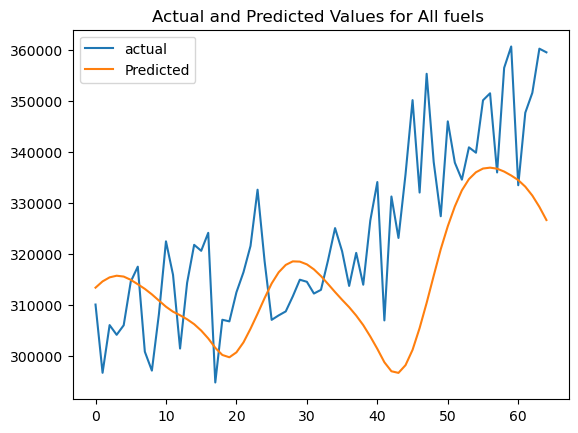

In [660]:
sns.lineplot(actual,label="actual")
sns.lineplot(prediction,label="Predicted")
plt.title("Actual and Predicted Values for All fuels ")

In [662]:
y_pred_coal=model.predict(X_test)
inv_pred_coal=scaler.inverse_transform(y_pred)
prediction_coal=inv_pred[:,1]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [664]:
y_actual_coal=scaler.inverse_transform(y_test)
actual_coal=y_actual[:,1]

In [666]:
def error_metrices(actual,pred):
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    r2=r2_score(actual,pred)
    mape=mean_absolute_percentage_error(actual,pred)
    dict_1={
        "mae":[mae],
        "mse":[mse],
        "r2_score":[r2],
        "mape":[mape]
    }
    error_df=pd.DataFrame(dict_1)
    return error_df
actual=actual_coal
pred=prediction_coal
error_metrices(actual,pred)

error=error_metrices(actual,pred)
error

,mae,mse,r2_score,mape
0,16960.643079,5.022743e+08,0.673974,0.215349


Text(0.5, 1.0, 'Actual and Predicted Values for Coal')

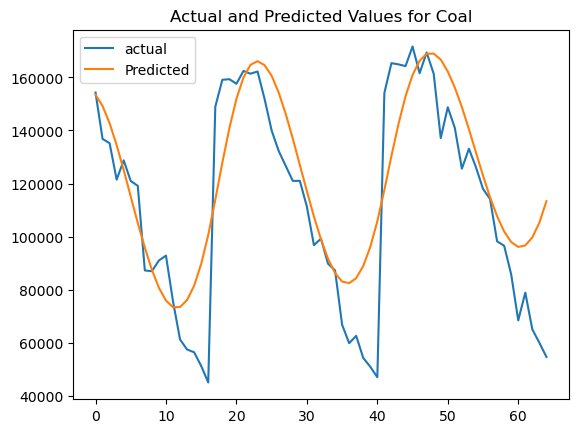

In [668]:
sns.lineplot(actual_coal,label="actual")
sns.lineplot(prediction_coal,label="Predicted")
plt.title("Actual and Predicted Values for Coal")

In [670]:
y_pred_ng=model.predict(X_test)
inv_pred_ng=scaler.inverse_transform(y_pred)
prediction_ng=inv_pred[:,2]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [672]:
y_actual_ng=scaler.inverse_transform(y_test)
actual_ng=y_actual[:,2]

In [674]:
def error_metrices(actual,pred):
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    r2=r2_score(actual,pred)
    mape=mean_absolute_percentage_error(actual,pred)
    dict_1={
        "mae":[mae],
        "mse":[mse],
        "r2_score":[r2],
        "mape":[mape]
    }
    error_df=pd.DataFrame(dict_1)
    return error_df
actual=actual_ng
pred=prediction_ng
error_metrices(actual,pred)

error=error_metrices(actual,pred)
error

,mae,mse,r2_score,mape
0,23724.590945,8.700937e+08,0.07799,0.226364


Text(0.5, 1.0, 'Actual and Predicted Values for Natural Gas')

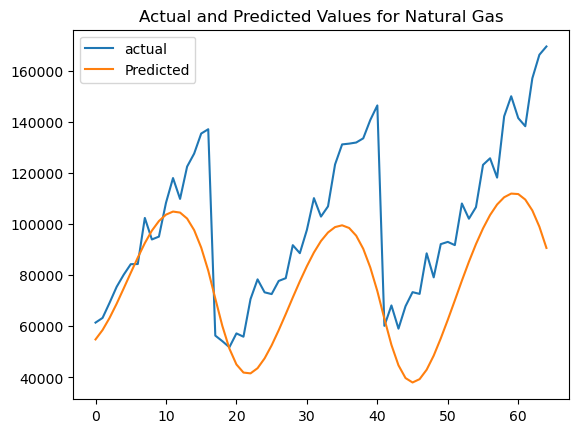

In [676]:
sns.lineplot(actual_ng,label="actual")
sns.lineplot(prediction_ng,label="Predicted")
plt.title("Actual and Predicted Values for Natural Gas")

In [678]:
y_pred_nuclear=model.predict(X_test)
inv_pred_nuclear=scaler.inverse_transform(y_pred)
prediction_nuclear=inv_pred[:,3]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [680]:
y_actual_nuclear=scaler.inverse_transform(y_test)
actual_nuclear=y_actual[:,3]

In [682]:
def error_metrices(actual,pred):
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    r2=r2_score(actual,pred)
    mape=mean_absolute_percentage_error(actual,pred)
    dict_1={
        "mae":[mae],
        "mse":[mse],
        "r2_score":[r2],
        "mape":[mape]
    }
    error_df=pd.DataFrame(dict_1)
    return error_df
actual=actual_nuclear
pred=prediction_nuclear
error_metrices(actual,pred)

error=error_metrices(actual,pred)
error

,mae,mse,r2_score,mape
0,2783.239386,1.120232e+07,-0.357958,0.045129


Text(0.5, 1.0, 'Actual and Predicted Values for Nuclear')

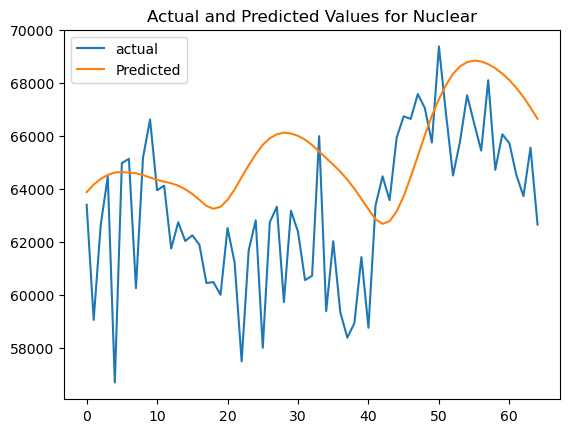

In [684]:
sns.lineplot(actual_nuclear,label="actual")
sns.lineplot(prediction_nuclear,label="Predicted")
plt.title("Actual and Predicted Values for Nuclear")

In [686]:
y_pred_ch=model.predict(X_test)
inv_pred_ch=scaler.inverse_transform(y_pred)
prediction_ch=inv_pred[:,4]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [688]:
y_actual_ch=scaler.inverse_transform(y_test)
actual_ch=y_actual[:,4]

In [690]:
def error_metrices(actual,pred):
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    r2=r2_score(actual,pred)
    mape=mean_absolute_percentage_error(actual,pred)
    dict_1={
        "mae":[mae],
        "mse":[mse],
        "r2_score":[r2],
        "mape":[mape]
    }
    error_df=pd.DataFrame(dict_1)
    return error_df
actual=actual_ch
pred=prediction_ch
error_metrices(actual,pred)

error=error_metrices(actual,pred)
error

,mae,mse,r2_score,mape
0,4063.139574,1.921170e+07,-5.611503,0.236889


Text(0.5, 1.0, 'Actual and Predicted Values for Conventioanal Hydro electric')

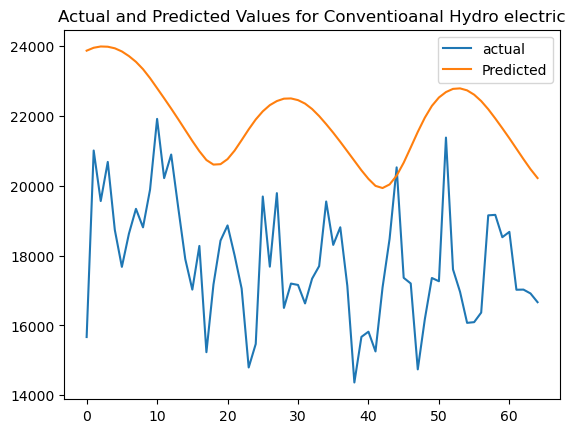

In [692]:
sns.lineplot(actual_ch,label="actual")
sns.lineplot(prediction_ch,label="Predicted")
plt.title("Actual and Predicted Values for Conventioanal Hydro electric")

In [696]:
y_pred_wind=model.predict(X_test)
inv_pred_wind=scaler.inverse_transform(y_pred)
prediction_wind=inv_pred[:,5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [698]:
y_actual_wind=scaler.inverse_transform(y_test)
actual_wind=y_actual[:,5]

In [700]:
def error_metrices(actual,pred):
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    r2=r2_score(actual,pred)
    mape=mean_absolute_percentage_error(actual,pred)
    dict_1={
        "mae":[mae],
        "mse":[mse],
        "r2_score":[r2],
        "mape":[mape]
    }
    error_df=pd.DataFrame(dict_1)
    return error_df
actual=actual_wind
pred=prediction_wind
error_metrices(actual,pred)

error=error_metrices(actual,pred)
error

,mae,mse,r2_score,mape
0,5734.638954,6.212414e+07,0.569652,1.533135


Text(0.5, 1.0, 'Actual and Predicted Values for Conventioanal Wind')

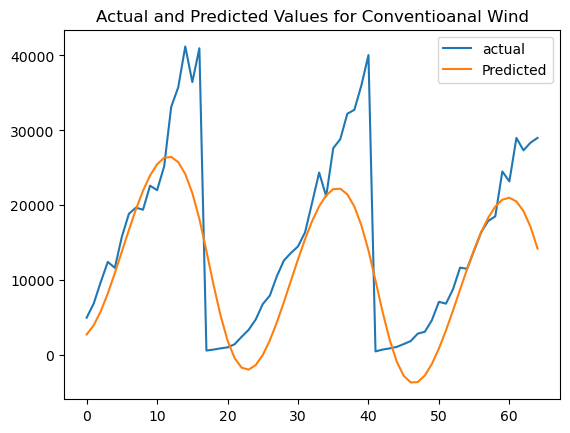

In [702]:
sns.lineplot(actual_wind,label="actual")
sns.lineplot(prediction_wind,label="Predicted")
plt.title("Actual and Predicted Values for Conventioanal Wind")